In [64]:
import pandas as pd

# Pfad zur CSV-Datei'
# file_path = '../old_out.csv'
# file_path = '../out.csv'

# Importieren der CSV-Datei als DataFrame
# df = pd.read_csv(file_path)
# df

In [65]:
import re

def get_floats_from_string(input_str):
    if len(input_str) == 0:
        return None
    if len(input_str) == 1:
        return float(input_str)
    if len(input_str) > 1:
        return float(input_str) / (10**(len(input_str)-1))

def parse_string_to_dict(input_str):
    # Verwenden von regulären Ausdrücken, um die erforderlichen Informationen zu extrahieren
    pattern = r"res_n(\d+)_p(\d+(\.\d+)?)_dp\((\d+(\.\d+)?_\d+(\.\d+)?_\d+(\.\d+)?)\)_dnp\((\d+(\.\d+)?_\d+(\.\d+)?_\d+(\.\d+)?)\)(_(m))?(_(r))?\.csv"

    match = re.match(pattern, input_str)
    if not match:
        return None

    nodes = int(match.group(1))
    percentages = float(get_floats_from_string(match.group(2)))
    dists_present = tuple(get_floats_from_string(val) for val in match.group(4).split('_'))
    dists_present = str(dists_present)
    dists_nonpresent = tuple(get_floats_from_string(val) for val in match.group(8).split('_'))
    dists_nonpresent = str(dists_nonpresent)
    median = bool(match.group(13))
    reciprocal = bool(match.group(15))

    # Erstellen des Dictionarys
    parsed_dict = {
        'nodes': nodes,
        'percentages': percentages,
        'dists_present': dists_present,
        'dists_nonpresent': dists_nonpresent,
        'median': median,
        'reciprocal': reciprocal
    }

    return parsed_dict

# Beispiel-Strings
strings = [
    "res_n5_p01_dp(1_01_1)_dnp(025_01_1)_m_r.csv",
    "res_n5_p06_dp(1_01_1)_dnp(0125_01_1)_r.csv",
    "res_n20_p01_dp(05_01_1)_dnp(025_01_1).csv"
]

# Parsen der Beispiel-Strings und Ausgabe der Ergebnisse
for s in strings:
    parsed_result = parse_string_to_dict(s)
    if parsed_result:
        print(parsed_result)
    else:
        print("Ungültiger String:", s)


print(get_floats_from_string('1'))
print(get_floats_from_string('01'))
print(get_floats_from_string('001'))


{'nodes': 5, 'percentages': 0.1, 'dists_present': '(1.0, 0.1, 1.0)', 'dists_nonpresent': '(0.25, 0.1, 1.0)', 'median': True, 'reciprocal': True}
{'nodes': 5, 'percentages': 0.6, 'dists_present': '(1.0, 0.1, 1.0)', 'dists_nonpresent': '(0.125, 0.1, 1.0)', 'median': False, 'reciprocal': True}
{'nodes': 20, 'percentages': 0.1, 'dists_present': '(0.5, 0.1, 1.0)', 'dists_nonpresent': '(0.25, 0.1, 1.0)', 'median': False, 'reciprocal': False}
1.0
0.1
0.01


In [73]:
import os
import pandas as pd
import tqdm

def concat_csv_files_in_directory(directory):
    # Liste alle Dateien im Verzeichnis mit der Endung ".csv" auf
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    print("Found {} CSV files in directory '{}'.".format(len(csv_files), directory))
    
    # Überprüfe, ob mindestens eine CSV-Datei gefunden wurde
    if not csv_files:
        print("Keine CSV-Dateien im Verzeichnis gefunden.")
        return None
    
    # Initialisiere ein leeres DataFrame, um die Daten zu speichern
    combined_df = pd.DataFrame()
    
    # Durchlaufe die CSV-Dateien und lese sie in das DataFrame ein
    for csv_file in tqdm.tqdm(csv_files, total=len(csv_files), desc="load csv files"):
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # add metadata to dataframe
        metadata = parse_string_to_dict(csv_file)
        for key, value in metadata.items():
            df[key] = [value]*len(df)
        
        # Füge das gelesene DataFrame dem kombinierten DataFrame hinzu
        combined_df = pd.concat([combined_df, df], ignore_index=True)
    
    return combined_df

In [75]:
dir_path = '../data_gen/out'
df = concat_csv_files_in_directory(dir_path)
df

Found 731 CSV files in directory '../data_gen/out'.


load csv files: 100%|██████████| 731/731 [00:05<00:00, 132.89it/s]


,delta_time,symmetric_difference,nodes,rel_size,success,tree,alg,percentages,dists_present,dists_nonpresent,median,reciprocal
0,0:00:00.002999,0.000000,10,85,True,81801960233,Alg1,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
1,0:00:00.067000,0.022222,10,85,True,81801960233,Alg2,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
2,0:00:00.037519,0.133333,10,85,True,81801960233,Alg2_normal,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
3,0:00:00.206519,0.133333,10,85,True,81801960233,Louvain,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
4,0:00:00.039191,0.200000,10,85,True,81801960233,Greedy Sum,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
58475,0:00:00.021425,0.300000,5,17,True,138430023237,Louvain,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,True
58476,0:00:00.001105,0.300000,5,17,True,138430023237,Greedy Sum,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,True
58477,0:00:00.002951,0.300000,5,17,True,138430023237,Greedy Average,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,True
58478,0:00:00.001000,0.400000,5,17,True,138430023237,Random Sum,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,True


In [56]:
del df['tree']
df

,delta_time,symmetric_difference,nodes,rel_size,success,alg,percentages,dists_present,dists_nonpresent,median,reciprocal
0,0:00:00.002999,0.000000,10,85,True,Alg1,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
1,0:00:00.067000,0.022222,10,85,True,Alg2,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
2,0:00:00.037519,0.133333,10,85,True,Alg2_normal,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
3,0:00:00.206519,0.133333,10,85,True,Louvain,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
4,0:00:00.039191,0.200000,10,85,True,Greedy Sum,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
...,...,...,...,...,...,...,...,...,...,...,...
52955,0:00:00.028001,1.000000,5,17,True,Louvain,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,False
52956,0:00:00.010000,1.000000,5,17,True,Greedy Sum,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,False
52957,0:00:00.002000,1.000000,5,17,True,Greedy Average,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,False
52958,0:00:00.002001,1.000000,5,17,True,Random Sum,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,False


In [57]:
def convert_time(t):
    if len(t.split('.')) == 1:  # Mikrosekunden fehlen
        t += '.000000'  # Fügen Sie Mikrosekunden hinzu
    return pd.to_datetime(t, format='%H:%M:%S.%f').time()

# df['delta_time'] = df['delta_time'].apply(convert_time)
df['delta_time'] = [convert_time(item) for item in tqdm.tqdm(df['delta_time'].values, total=len(df['delta_time'].values), desc="load csv files")]
df

load csv files: 100%|██████████| 52960/52960 [00:03<00:00, 17044.02it/s]


,delta_time,symmetric_difference,nodes,rel_size,success,alg,percentages,dists_present,dists_nonpresent,median,reciprocal
0,00:00:00.002999,0.000000,10,85,True,Alg1,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
1,00:00:00.067000,0.022222,10,85,True,Alg2,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
2,00:00:00.037519,0.133333,10,85,True,Alg2_normal,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
3,00:00:00.206519,0.133333,10,85,True,Louvain,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
4,00:00:00.039191,0.200000,10,85,True,Greedy Sum,0.1,"(0.5, 0.1, 1.0)","(0.125, 0.1, 1.0)",False,False
...,...,...,...,...,...,...,...,...,...,...,...
52955,00:00:00.028001,1.000000,5,17,True,Louvain,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,False
52956,00:00:00.010000,1.000000,5,17,True,Greedy Sum,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,False
52957,00:00:00.002000,1.000000,5,17,True,Greedy Average,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,False
52958,00:00:00.002001,1.000000,5,17,True,Random Sum,0.4,"(1.0, 0.1, 1.0)","(0.375, 0.1, 1.0)",False,False


In [58]:
def time_to_units(time_obj, time_unit):
    """ Konvertiert ein datetime.time-Objekt in die gewählte Zeiteinheit. """
    if time_unit == 'seconds':
        return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    elif time_unit == 'minutes':
        return time_obj.hour * 60 + time_obj.minute + time_obj.second / 60
    elif time_unit == 'hours':
        return time_obj.hour + time_obj.minute / 60 + time_obj.second / 3600
    elif time_unit == 'milliseconds':
        return (time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second) * 1000 + time_obj.microsecond / 1000
    elif time_unit == 'microseconds':
        return (time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second) * 1000000 + time_obj.microsecond

def determine_time_unit(column):
    """ Bestimmt die passende Zeiteinheit basierend auf dem Bereich der Werte in der Spalte. """
    total_seconds = column.apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second + t.microsecond / 1e6)
    max_time = total_seconds.max()
    min_time = total_seconds.min()

    if max_time - min_time < 60:  # Bereich ist weniger als 1 Minute
        if max_time - min_time < 1:  # Bereich ist weniger als 1 Sekunde
            return 'milliseconds' if max_time < 1 else 'seconds'
        return 'seconds'
    elif max_time - min_time < 3600:  # Bereich ist weniger als 1 Stunde
        return 'minutes'
    else:
        return 'hours'

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

def scatterplot_matrix(dataframe, color_column=None, subplot_size=2.5, subplot_spacing=0.05):
    n_vars = dataframe.shape[1]
    fig, axes = plt.subplots(n_vars, n_vars, figsize=(n_vars * subplot_size, n_vars * subplot_size))

    # Umwandeln von datetime.time Spalten in numerische Werte
    num_dataframe = dataframe.copy()
    for col in num_dataframe.columns.copy():
        if isinstance(num_dataframe[col].iloc[0], datetime.time):
            time_unit = determine_time_unit(num_dataframe[col])
            num_dataframe[col] = num_dataframe[col].apply(lambda t: time_to_units(t, time_unit))
            num_dataframe = num_dataframe.rename(columns={col: f'{col}_{time_unit}'})
            
    # Farbkodierung einrichten
    if color_column is not None and color_column in num_dataframe.columns:
        unique_values = num_dataframe[color_column].unique()
        colormap = plt.cm.get_cmap('viridis', len(unique_values))
        color_dict = {val: colormap(i) for i, val in enumerate(unique_values)}
        colors = num_dataframe[color_column].map(color_dict)
    else:
        colors = 'b'

    # Erstellen der Scatterplots
    for i in range(n_vars):
        for j in range(n_vars):
            ax = axes[i, j]
            if i == j:
                ax.text(0.5, 0.5, num_dataframe.columns[i], horizontalalignment='center', verticalalignment='center', fontsize=12)
                ax.set_xticks([])
                ax.set_yticks([])
            else:
                ax.scatter(num_dataframe.iloc[:, j], num_dataframe.iloc[:, i], c=colors)

            # Setzen der Ticklabels
            if i != n_vars - 1:
                ax.set_xticklabels([])
            if j != 0:
                ax.set_yticklabels([])

            # Setzen der Achsenbeschriftungen
            if j == 0:
                ax.set_ylabel(num_dataframe.columns[i])
            if i == n_vars - 1:
                ax.set_xlabel(num_dataframe.columns[j])

    # Anpassen der Abstände zwischen den Subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=subplot_spacing, hspace=subplot_spacing)

    plt.show()

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.ticker import MaxNLocator

def plot_distribution(dataframe, color_column=None, max_xticks=10, subplot_width=2.5, subplot_hight=2, subplot_spacing=0.05):
    n_vars = dataframe.shape[1]
    
    if color_column is not None:
        unique_values = dataframe[color_column].unique()
        num_colors = len(unique_values)
    else:
        unique_values = [None]
        num_colors = 1
    colormap = plt.cm.get_cmap('viridis', len(unique_values))
    color_dict = {val: colormap(i) for i, val in enumerate(unique_values)}
    
    fig, axes = plt.subplots(n_vars, num_colors, figsize=(subplot_width * num_colors, subplot_hight * n_vars))
    
    # Kopieren des DataFrames zur Umwandlung von datetime.time in numerische Werte
    num_dataframe = dataframe.copy()
    for col in num_dataframe.columns.copy():
        if isinstance(num_dataframe[col].iloc[0], datetime.time):
            time_unit = determine_time_unit(num_dataframe[col])
            num_dataframe[col] = num_dataframe[col].apply(lambda t: time_to_units(t, time_unit))
            num_dataframe = num_dataframe.rename(columns={col: f'{col}_{time_unit}'})
    
    for i, unique_value in enumerate(unique_values):
        for j, column in enumerate(num_dataframe.columns):
            if len(unique_values) == 1:
                ax = axes[j]
            else:
                ax = axes[j, i]  # Vertauschte Indizes für das gewünschte Layout
            
            if color_column is not None:
                data = num_dataframe[num_dataframe[color_column] == unique_value][column]
                # ax.hist(data, bins=20, edgecolor='black', label=f'{color_column}: {unique_value}', color=color_dict[unique_value])  # Ändere die Farbe hier
                ax.hist(data, bins=20, edgecolor='black', color=color_dict[unique_value])  # Ändere die Farbe hier
                ax.set_xlabel(column)
                ax.xaxis.set_major_locator(MaxNLocator(max_xticks))
                if i == 0:  # Beschrifte nur die linken Achsen
                    ax.set_ylabel('Häufigkeit')
                else:
                    ax.set_yticklabels([])
                # ax.legend()
            else:
                ax.hist(num_dataframe[column], bins=20, edgecolor='black')
                ax.set_xlabel(column)
                ax.xaxis.set_major_locator(MaxNLocator(max_xticks))
                if i == 0:  # Beschrifte nur die linken Achsen
                    ax.set_ylabel('Häufigkeit')
                else:
                    ax.set_yticklabels([])
    
    for i, unique_value in enumerate(unique_values):
        if color_column is not None:
            axes[0, i].set_title(f'{color_column}: {unique_value}')
    
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=subplot_spacing, hspace=subplot_spacing)

    plt.tight_layout()
    plt.show()


C:\Users\Max\AppData\Local\Temp\ipykernel_29112\3099263949.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(unique_values))


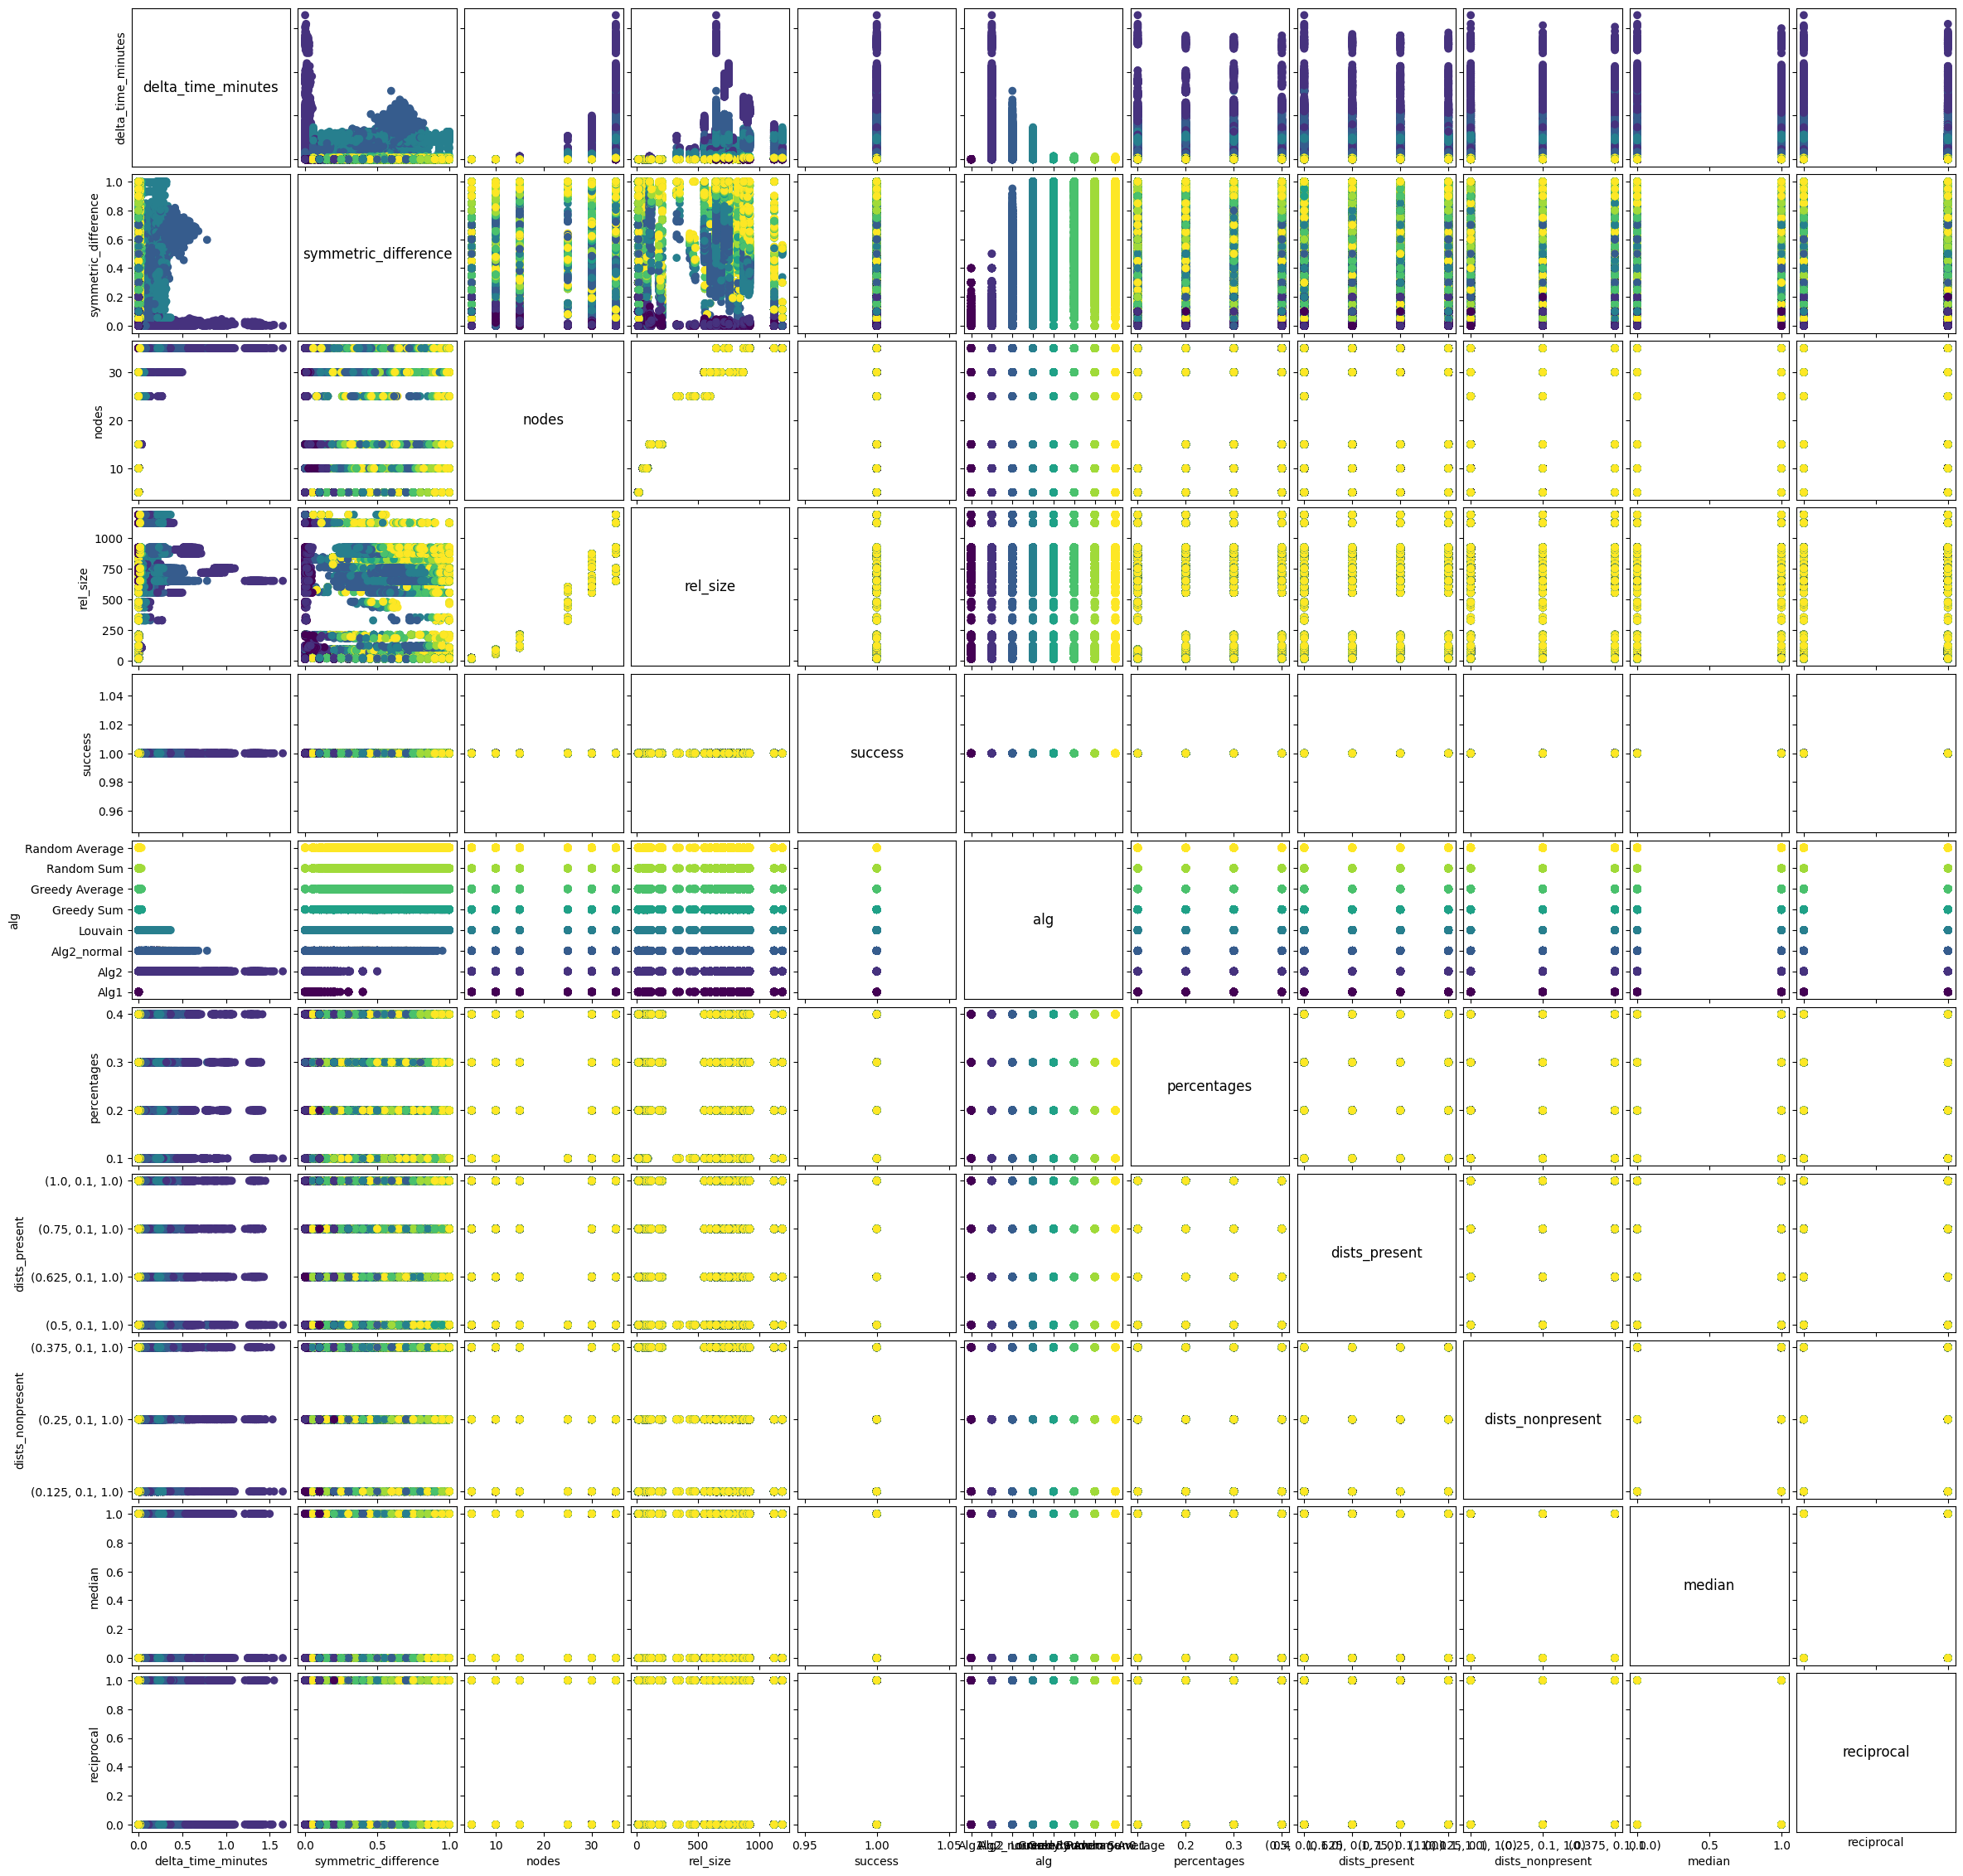

In [61]:
scatterplot_matrix(df, color_column='alg')

C:\Users\Max\AppData\Local\Temp\ipykernel_29112\2516991525.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(unique_values))
c:\Users\Max\Documents\Studium\Leipzig\M 5. Semester\graphentheo\praktikum\GraphentheoPraktikum\venv\Lib\site-packages\matplotlib\axes\_axes.py:6859: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

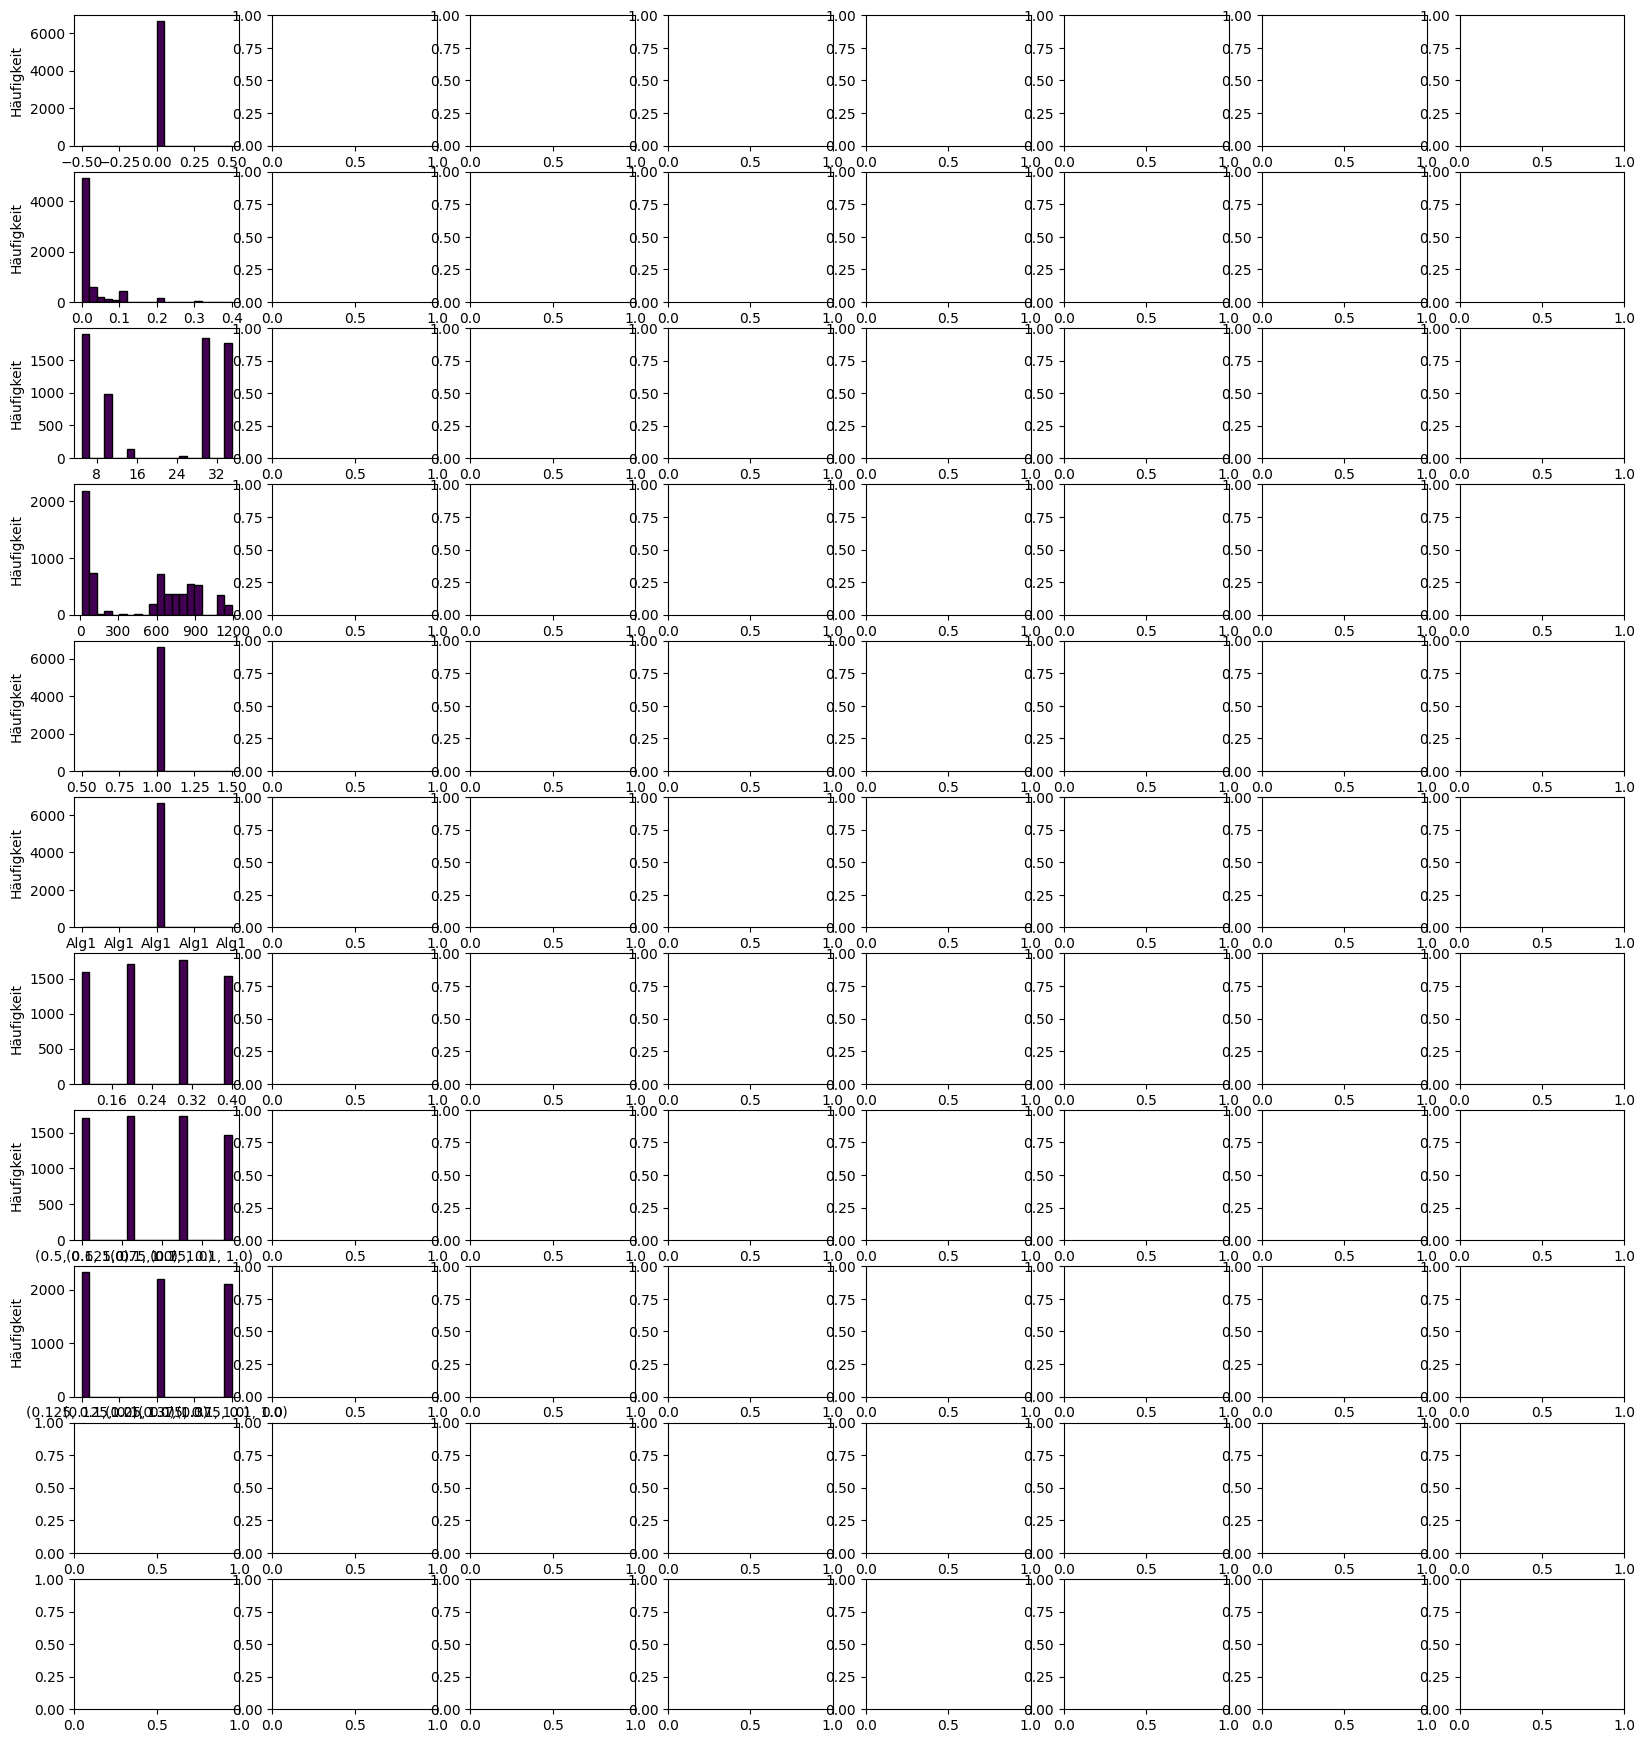

In [62]:
plot_distribution(df, color_column='alg', max_xticks=5)
# plot_distribution(df, max_xticks=5)

In [34]:
# # todos
# baum params mit aufnehmen und vergleichen, wie parcial prozent
# boxplots für symmetric differences